<a href="https://colab.research.google.com/github/Jhanvi26/Mini-Project---Image-Classification/blob/master/ML_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!ls

drive  sample_data


In [ ]:
cd /content/drive/My Drive/Untitled folder

/content/drive/My Drive/Untitled folder


In [ ]:
!ls

new


In [ ]:
!mkdir images

In [ ]:
cd images

/content/drive/My Drive/Untitled folder/images


In [ ]:
from bing_image_downloader import downloader 
downloader.download("papaya fruit",limit = 5, output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 5 Images on Page 1.


[%] Downloading Image #1 from http://nicolelana.com/wp-content/uploads/2014/05/Green-Papaya-Fruit-image-3.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://4.bp.blogspot.com/-qZUN3zJS5D4/VBqQP7J-OsI/AAAAAAAAAJk/lMVTM8kjxzQ/s1600/pepaya.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://sundayfarmer.files.wordpress.com/2011/02/papaya.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://rampages.us/mrbananapepper/wp-content/uploads/sites/2634/2014/10/FA0385-Papaya.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.thestar.com/5NAF5R9driqD0k4ftEdJ-_TXT1E=/1086x824/smart/filters:cb(2700061000)/https://www.thestar.com/content/dam/thestar/life/food_wine/2013/04/05/sweet_papaya_a_nutritional_powerhouse_fresh_bites/papaya.jpg
[%] File Downloaded !



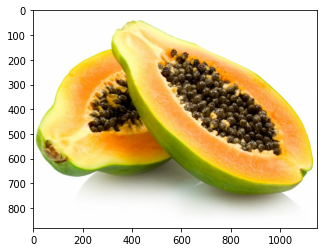

In [ ]:
path = '/content/drive/My Drive/Untitled folder/images/images/papaya fruit/Image_1.jpg'
import cv2
import matplotlib.pyplot as plt

i = cv2.imread(path)
i = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
plt.imshow(i)

In [ ]:
downloader.download("banana fruit",limit = 5, output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 5 Images on Page 1.


[%] Downloading Image #1 from http://4.bp.blogspot.com/-gcGCJsbTAY0/T7hKgxLiY7I/AAAAAAAAAL4/R4seeHldb_E/s1600/banana-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.feedipedia.org/sites/default/files/images/banana_cavendish.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://static.independent.co.uk/s3fs-public/thumbnails/image/2013/04/22/18/24-Banana.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.organicfacts.net/wp-content/uploads/2013/05/Banana3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://buzzghana.com/wp-content/uploads/2015/08/banana-e1439973458806.png
[%] File Downloaded !



In [ ]:
import os
import cv2
path = '/content/drive/My Drive/Untitled folder/images/images/papaya fruit'
for filename in os.listdir(path):
  i = cv2.imread(os.path.join(path,filename))
  print(i.shape)

  #/content/drive/My Drive/Untitled folder/images/images/papaya fruit/Image_1.jpg


(881, 1150, 3)
(1096, 1000, 3)
(1712, 2560, 3)
(2304, 3108, 3)
(824, 1086, 3)


In [ ]:
import os 
from skimage.io import imread 
from skimage.transform import resize

In [ ]:
target =[] #This is the list of target output 
flat_data =[] #Image pixel in flattened style 
images = []

path = '/content/drive/My Drive/Untitled folder/images/images/'
for dirpath, dirnames, filenames in os.walk(path):
  for filename in filenames:
    category = dirpath.split('/')[-1]
    target.append(category)
    img = imread(f'{path}{category}/{filename}')
    img_resized = resize(img,(50,50,3))   #scaling down
    flat_data.append(img_resized.flatten())
    images.append(img_resized)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

print(flat_data.shape)
print(target.shape)
print(images.shape)

target


(10, 7500)
(10,)
(10, 50, 50, 3)


array(['papaya fruit', 'papaya fruit', 'papaya fruit', 'papaya fruit',
       'papaya fruit', 'banana fruit', 'banana fruit', 'banana fruit',
       'banana fruit', 'banana fruit'], dtype='<U12')

In [ ]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,papaya fruit
1,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.960941,0.964863,0.953098,0.800784,0.826118,0.746941,0.554784,0.609529,0.429451,0.414353,0.482824,0.263373,0.304235,0.374824,0.147373,0.245255,0.318706,0.083412,0.247216,...,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,papaya fruit
2,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.483843,0.500745,0.426235,0.523059,0.544369,0.467710,0.576471,0.603678,0.530753,0.643137,0.670588,0.607843,0.713725,0.741624,0.694565,0.784314,0.811765,0.781137,0.849804,0.874510,0.855945,0.929412,0.948776,0.940933,0.988235,0.992157,0.988235,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,papaya fruit
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,papaya fruit
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,papaya fruit


In [ ]:
x = flat_data 
y = df.Target 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)


In [ ]:
from sklearn.svm import SVC 

In [ ]:
model = SVC()
model.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array(['papaya fruit', 'banana fruit', 'papaya fruit'], dtype=object)

In [ ]:
y_test

2    papaya fruit
8    banana fruit
4    papaya fruit
Name: Target, dtype: object

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [ ]:
accuracy_score(y_pred,y_test)

1.0

In [ ]:
confusion_matrix(y_pred,y_test)

array([[1, 0],
       [0, 2]])

In [ ]:
z = 1
while z == 1:
  print("enter png or jpg picture link of banana or papaya")
  path = input()
  img = imread(path)

  test_flat=[]
  images=[]
  img_resize = resize(img,(50,50,3))
  test_flat.append(img_resize.flatten())
  images.append(img_resize)

  output=model.predict(test_flat)
  print(output)
  print("try another picture press 1\n else enter 0")
  z = int(input())


enter png or jpg picture link of banana or papaya
https://th.bing.com/th/id/OIP.OdtyQ06aDf8T2g3sidtCsAHaGa?w=198&h=180&c=7&o=5&dpr=1.25&pid=1.7
['papaya fruit']
try another picture press 1
 else enter 0
1
enter png or jpg picture link of banana or papaya
https://th.bing.com/th/id/OIP.MS6bnnO_lpTrDIEUANtlOwHaEw?w=289&h=185&c=7&o=5&dpr=1.25&pid=1.7
['papaya fruit']
try another picture press 1
 else enter 0
1
enter png or jpg picture link of banana or papaya
https://th.bing.com/th/id/OIP.OeOKEyU8sHeSThcUsPKS6QHaF2?w=238&h=188&c=7&o=5&dpr=1.25&pid=1.7
['banana fruit']
try another picture press 1
 else enter 0
1
enter png or jpg picture link of banana or papaya
https://th.bing.com/th/id/OIP.VT75s5zXiXkjUgklTeDuZQHaG9?w=196&h=180&c=7&o=5&dpr=1.25&pid=1.7
['banana fruit']
try another picture press 1
 else enter 0
0


In [ ]:
import numpy as np
a = np.array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])